# Installing Dependencies

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import join as opj
import os
import sys
import time
import wandb
from tqdm import tqdm
import matplotlib.animation as animation
from PIL import Image
from matplotlib import rc
from scipy.sparse import coo_matrix
rc('animation', html='jshtml')

In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.data import makedirs, extract_zip
# from torchvision.datasets import VisionDataset
from torchvision import transforms

from torch.utils.data import default_collate
import networkx as nx

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
def dense_edge(edge_index, data = None):
    assert edge_index.ndim ==2
    assert edge_index.shape[0] == 2

    if data is None:
        data = np.ones(u.shape, dtype=np.int8)
    u, v = edge_index
    n = len(np.unique(u)) + 1
    m = coo_matrix((data, (u, v)), shape  = (n,n))
    return m.toarray()

# Dataset 
Skip this section

In [ ]:
class LCDDataset(Dataset):
    '''
      loading all images and corresponding_matrix for the specific dataset based on its name.
      dataset_name:
        1. CC_orig
        2. NC_orig
        3. CC_reduced
        4. NC_reduced
        5. KITTY_00
        6. KITTY_05
        7. KAIST_NORTH
        8. KAIST_EAST
        9. KAIST_WEST
      '''
    def __init__(self, dataset_name, root_dir = './Datasets' , URL = './Datasets',
                 transform=None, pre_transform=None, pre_filter=None):
        '''
        Input params: 
              dataset_name = supported dataset, as mentioned above
              root_dir = path to create dataset
              URL = where all .zip file is saved
        '''
        
        
        all_dataset = ['CC_orig', 'NC_orig', 'CC_reduced', 'NC_reduced', 'KITTY_00', 'KITTY_05',
                    'KAIST_NORTH','KAIST_EAST','KAIST_WEST']
        assert dataset_name in all_dataset, """Supported dataset are ['CC_orig', 'NC_orig', 'CC_reduced', 'NC_reduced', 'KITTY_00', 'KITTY_05',
                                                'KAIST_NORTH','KAIST_EAST','KAIST_WEST']"""

        assert os.path.isdir(URL), "Invalid BASE_DIR provided"
        
        self.dataset = dataset_name
        self.url = URL
        self.root = os.path.join(root_dir, self.dataset) 
        


        # if self.download.__qualname__.split('.')[0] != 'Dataset':
        if not os.path.isdir(self.raw_dir):
            print('Downloading Dataset....')
            makedirs(self.raw_dir)
            self.download()
        
        self.gt = scipy.io.loadmat(os.path.join(self.root, 'gt.mat'))['truth']
        
        

    @property
    def raw_dir(self) -> str:
        return os.path.join(super().raw_dir, 'Image')

    @property
    def naming_digits(self) -> int:
        return len(os.path.splitext(os.listdir(self.raw_dir)[0])[0])

    @property
    def file_ext(self) -> str:
        return os.path.splitext(os.listdir(self.raw_dir)[0])[1]

    @property
    def raw_file_names(self):
        return [format(i, f'0{self.naming_digits}d')+self.file_ext for i in range(self.__len__())]

    
    def process(self):
        self.gt = self.gt + self.gt.T - np.identity(self.__len__()) 
        u, v  = np.where(self.gt != 0)
        
        # for 
        # idx = 0
        # for raw_path in self.raw_paths:
        #     # Read data from `raw_path`.
        #     data = Data(...)

        #     if self.pre_filter is not None and not self.pre_filter(data):
        #         continue

        #     if self.pre_transform is not None:
        #         data = self.pre_transform(data)

        #     torch.save(data, osp.join(self.processed_dir, f'data_{idx}.pt'))
        #     idx += 1

    def download(self):
        '''
        Downloading dataset
        '''
        ! unzip -u -q {os.path.join(self.url, self.dataset+'.zip')} -d ./{os.path.join(self.root)}
        ! unzip -u -q {os.path.join(self.root, 'Image.zip')} -d ./{os.path.join(self.root, 'raw')}
        

    def __len__(self):
        return len(os.listdir(self.raw_dir))

    def get(self, idx):
        # data = torch.load(os.path.join(self.raw_dir, f'data_{idx}.pt'))
        img_path = os.path.join(self.raw_dir, self.raw_file_names[idx])
        # data = Image.read(img_path)
        return img_path

In [ ]:
dataset = LCDDataset('NC_reduced')
xx = []
for i in dataset.raw_file_names:
    xx.append(transforms.ToTensor()(Image.open(dataset.get(i))))

u, v = np.where(dataset.gt!=0)
edge = torch.tensor(np.array([u,v]), dtype = torch.long)
g = Data(default_collate(xx), edge_index=edge)

In [ ]:
dataset.get(1)

In [ ]:
# dataset.naming_digits
# dataset.raw_file_names
# dataset.get(1)

In [ ]:
# from torch_geometric.utils import to_networkx
# gmap = to_networkx(g, to_undirected=True)
# nx.draw(gmap)

In [ ]:
plt.imshow(dataset.gt)

In [ ]:
gtt = dataset.gt + dataset.gt.T - np.identity(len(dataset.gt))
plt.imshow(gtt)

# Data -> Graph

In [ ]:
from torch_geometric.data import Data
import torch_geometric.transforms as T

In [ ]:
dataset_path = './Datasets/NC_reduced/'
image_path = os.path.join(dataset_path, 'Image', 'Image')
gt = scipy.io.loadmat(os.path.join(dataset_path, 'gt.mat'))['truth']
gt = gt + gt.T - np.eye(len(gt))

create the class based on the Data and add the load_node method that adds new nodes in the graph with neighbours.

In [ ]:
customGraph = None
del customGraph
from model import customGraph

In [ ]:
dd = customGraph()
dd.add_node(torch.randn((1,5,5)))
dd.add_node(torch.randn((1,5,5)), [1], torch.randn((1,1)))
dd.add_node(torch.randn((1,5,5)))
dd.add_node(torch.randn((1,5,5)), [1,2], torch.randn((2,1)))

In [ ]:
dd.has_isolated_nodes()
# torch.cat((self.edge_index, edge_index), dim = -1)
# torch.cat((torch.randint(0,2,(2,3)), dd.edge_index), dim = -1)

In [ ]:
if dd.edge_index:
    print('xx')

In [ ]:
dd.edge_index

In [ ]:
n = dd.num_nodes
n

In [ ]:
data = Data()
data.node_id = torch.arange(len(gt))
temp = np.tril(np.ones((data.num_nodes, data.num_nodes)), k = -1)
u, v = np.where(temp!=0)
data.edge_index = torch.tensor(np.array([u,v]), dtype = torch.long)
# data.edge_attr = torch.tensor(np.expand_dims(gt.flatten(),-1))
data.edge_attr = torch.tensor(np.expand_dims(gt[np.tril_indices_from(gt, k=-1)],-1))

xx = []
for i in sorted(os.listdir(image_path)):
    xx.append(transforms.ToTensor()(Image.open(os.path.join(image_path, i))))

data.x = default_collate(xx)
data['time'] = torch.arange(data.num_nodes)
# data = T.ToUndirected()(data)
data

In [ ]:
# data.add_node(torch.randn(1,3,480,640), [1,2,3])
# data.num_nodes
# torch.argwhere(data.edge_index == torch.tensor([[395],[1]]))

In [ ]:
(data.edge_index == torch.tensor([[395],[1]]))

In [ ]:
# xx = data.x
# new = torch.randn((1,3,480,640))
# data.node_id.append(394)
e = data.node_id[:10] < 5 
assert e.all()

In [ ]:
# u = [5]*len(e)
# tt = torch.tensor([u,e])
# print(torch.cat((data.edge_index, tt), dim = 1).shape)
# print(data.edge_index.shape)
# type([1])
OptTensor

In [ ]:
# plt.imshow(data.x[0].cpu().numpy())
plt.imshow(data.x[0].detach().cpu().permute(1,2,0).numpy())

# Model

In [ ]:
from torchvision.models import resnet50
from torchvision import transforms, utils
from torch_geometric.nn import MessagePassing, GAE
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor

In [ ]:
from enum import Enum
"""['AlexNet', "ConvNext", "DenseNet", "EfficientNet", "EfficientNetV2",
                        "GoogLeNet", "InceptionV3", "MaxVit", "MNASNet", "MobileNetV2", "MobileNetV3",
                        "RegNet", "ResNet", "ResNeXt", "ShuffleNetV2", "SqueezeNet",
                        "SWINTx", "VGG", "ViT", "WideResNet"]"""

class MODELS:
    
    def load_model(self, name):
        default = None
        return getattr(self, name.lower(), lambda: default)()

    def alexnet(self):
        from torchvision.models import AlexNet
        return AlexNet(weights = 'DEFAULT')

    def convnext(self):
        from torchvision.models import ConvNeXt
        return ConvNeXt(weights = 'DEFAULT')

    def densenet(self):
        from torchvision.models import DenseNet
        return DenseNet(weights = 'DEFAULT')

    def efficientnet(self):
        from torchvision.models import EfficientNet
        return EfficientNet(weights = 'DEFAULT')

    def efficientnetv2(self):
        from torchvision.models import efficientnet_v2_l
        return efficientnet_v2_l(weights = 'DEFAULT')

    def googlenet(self):
        from torchvision.models import GoogLeNet
        return GoogLeNet(weights = 'DEFAULT')

    def inceptionv3(self):
        from torchvision.models import Inception3
        return Inception3(weights = 'DEFAULT')

    def maxvit(self):
        from torchvision.models import MaxVit
        return MaxVit(weights = 'DEFAULT')

    def mnasnet(self):
        from torchvision.models import MNASNet
        return MNASNet(weights = 'DEFAULT')

    def mobilenetv2(self):
        from torchvision.models import MobileNetV2
        return MobileNetV2(weights = 'DEFAULT')

    def mobilenetv3(self):
        from torchvision.models import MobileNetV3
        return MobileNetV3(weights = 'DEFAULT')

    def regnet(self):
        from torchvision.models import RegNet
        return RegNet(weights = 'DEFAULT')
    
    def resnet(self):
        from torchvision.models import resnet50
        return resnet50(weights = 'IMAGENET1K_V2')
        
    def resnext(self):
        from torchvision.models import resnext50_32x4d
        return resnext50_32x4d(weights = 'DEFAULT')

    def shufflenetv2(self):
        from torchvision.models import ShuffleNetV2
        return ShuffleNetV2(weights = 'DEFAULT')

    def squeezenet(self):
        from torchvision.models import SqueezeNet
        return SqueezeNet(weights = 'DEFAULT')

    def swintx(self):
        from torchvision.models import SwinTransformer
        return SwinTransformer(weights = 'DEFAULT')

    def vgg(self):
        from torchvision.models import vgg19
        return vgg19(weights = 'DEFAULT')

    def vit(self):
        from torchvision.models import VisionTransformer
        return VisionTransformer(weights = 'DEFAULT')

    def wideresnet(self):
        from torchvision.models import wide_resnet50_2
        return wide_resnet50_2(weights = 'DEFAULT')

In [ ]:
class FeatureExtractor(torch.nn.Module):
    '''
    Feature Extractor class
    '''
    def __init__(self) -> None:
        super().__init__()
        #Feature extractor 
        self.fx_base = resnet50(weights = 'IMAGENET1K_V2')       #feature extractor model
        for param in self.fx_base.parameters():
            param.requires_grad = False   #so that with torch.no_grad is not required
        self.fx_required = {'flatten':'flatten'}        #required layers from all the get_graph_node_names(m)
        self.fx = create_feature_extractor(self.fx_base, return_nodes=self.fx_required)       #last dense layer

    def forward(self, x):
        return self.fx(x)['flatten']

class Matcher(torch.nn.Module):
    '''
    Feature matcher class to compute similarity of given two node feature
    '''    
    def forward(self, n1, n2, edge_index = None):
        # n1 = n1[edge_index[0]]
        # n2 = n2[edge_index[1]]
        return (n1 @ n2.t()) / (torch.norm(n1, dim =-1).unsqueeze(-1) @ torch.norm(n2, dim =-1).unsqueeze(-1).t())

# fx = FeatureExtractor()
# mx = Matcher()
# gae = GAE(fx)

class LoopClosureDetector(torch.nn.Module):
    '''
    LCD base model for extracting features of the node image & then calculating matching criteria to
    predict edge between two nodes.
    '''
    def __init__(self, FX, MX) -> None:
        super().__init__()  
        self.fx = FX()
        self.mx = MX()

    def forward(self, x, n):
        # x has shape [N, in_channels], N = total number of nodes in a graph
        # n \belongs to N, some specific nodes  
        # edge_index has shape [2, E]
        # introduce another variable and then make the comparision bewteen them
        # 1st -> graph nodes, 2nd-> another graph nodes or indiviudal image to add in graph
        x = self.fx(x)
        n = self.fx(n)
        pred = self.mx(x, n)
        return pred
    


In [ ]:
m = LoopClosureDetector(FeatureExtractor, Matcher)

In [ ]:
data.x[:2].shape

In [ ]:
# m = m.cpu()
res = m(data.x[:2], data.x[3:6]) #1m22.5s

In [ ]:
plt.imshow(res)

In [ ]:

# data = data.to(device)
m = m.to(device).eval()

# DataLoader

In [ ]:
from torch_geometric.loader import DataLoader, LinkNeighborLoader, NodeLoader, NeighborLoader
from torch_geometric.loader import RandomNodeLoader
from torch_geometric.sampler.base import NodeSamplerInput


In [ ]:
# data_loader = NodeLoader([data], batch_size = 32)
# node_loader = LinkNeighborLoader(data, [10], batch_size = 10 )
node_loader = NeighborLoader(data, [10], batch_size = 10 )

# for time constraint sampling
# node_loader = LinkNeighborLoader(data, [-1], batch_size = 1, time_attr='time', 
#                                     edge_label_time=torch.arange(data.edge_index.shape[1]))


In [ ]:
dd = next(iter(node_loader))
print(dd.input_id)
print(dd.node_id)
# print(dd.edge_label_index)
print(dd.edge_index)
dd

In [ ]:
ssource = dd.x[dd.edge_index[0, :]].to(device)
ddest = dd.x[dd.edge_index[1,:]].to(device)
m(ssource, ddest)

In [ ]:
# dd.x[dd.edge_index[1]].shape
len(node_loader)

In [ ]:
# dd.edge_index
# dd.edge_label_index
len(node_loader)

In [ ]:
pred = np.zeros((data.num_nodes, data.num_nodes))
m = m.to(device)
for batch in tqdm.tqdm(node_loader):
    with torch.no_grad():
        batch = batch.to(device)
        source = batch.node_id[batch.edge_index[0]]
        dest = batch.node_id[batch.edge_index[1]]
        p = m(batch.x[batch.edge_index[0]], batch.x[batch.edge_index[1]])
        u,v = source.detach().cpu().numpy(), dest.detach().cpu().numpy()
        temp = np.stack(np.meshgrid(u,v), -1).reshape(-1,2)
        u, v = temp[:,0], temp[:,1]
        pred[(u,v)] = p.detach().cpu().numpy().flatten()
        


In [ ]:
plt.imshow(pred)

In [ ]:
index = np.tril_indices_from(pred, k=-1)
_pred = pred[index]
_gt = data.edge_attr.flatten()

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

precision, recall, _ = precision_recall_curve(_gt, _pred)
disp = PrecisionRecallDisplay(precision, recall)
disp.plot()
plt.show()

Manual **For Loop**

In [4]:
# globals().pop('customGraph')
from model import FeatureExtractor, Matcher, customGraph


In [5]:
dataset_path = "./Datasets/NC_reduced/Image/Image/"
fx = FeatureExtractor('resnet').to(device)
mx = Matcher().to(device)

In [6]:
def read_img(img_path):
    return transforms.ToTensor()(Image.open(img_path)).unsqueeze(0)

In [32]:
graph = customGraph().to(device)
time_complexity = []
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
for n, i in tqdm(enumerate(sorted(os.listdir(dataset_path)))):
    start.record()
    img = read_img(opj(dataset_path, i)).to(device)
    features = fx(img)
    if graph.num_nodes == 0:
        graph.add_node(features)
    else:
        features = fx(img)
        match_score = mx(graph.x , features).detach().cpu()
        graph.add_node(features, range(n), match_score)
    end.record()
    time_complexity.append(start.elapsed_time(end))

394it [00:11, 34.79it/s]


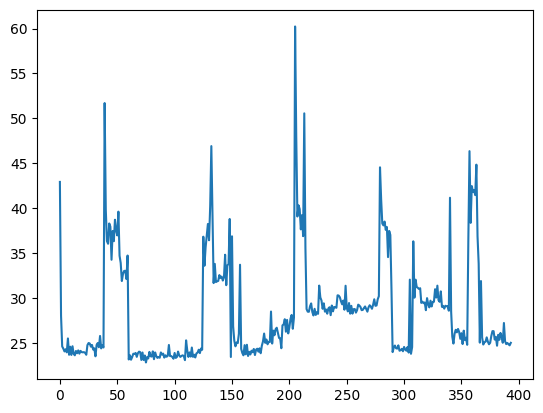

In [34]:
plt.plot(range(394), time_complexity)

In [27]:
edge_index = graph.edge_index.detach().cpu().numpy()
data = graph.edge_attr.detach().cpu().numpy()
pred = dense_edge(edge_index, data.squeeze())
gt = scipy.io.loadmat(opj('./Datasets/NC_reduced/', 'gt.mat'))['truth'].astype(bool).T
gt = gt - np.eye(len(gt))

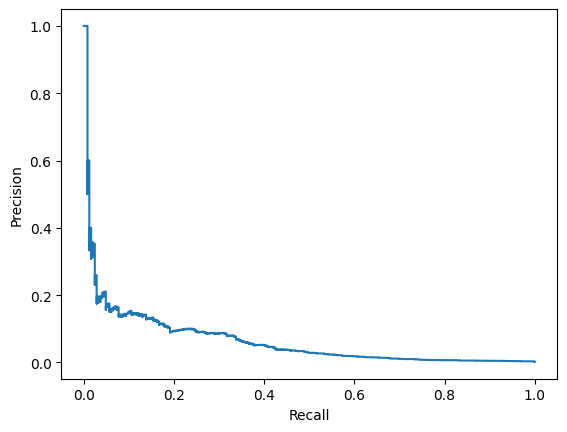

In [29]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

precision, recall, _ = precision_recall_curve(gt.flatten(), pred.flatten())
disp = PrecisionRecallDisplay(precision, recall)
disp.plot()
plt.show()

Experimental

In [ ]:
# 394 * 394 / 32

In [ ]:
plt.imshow(dd.x[0].detach().cpu().permute(1,2,0).numpy())

In [ ]:
batch #33*33

# plt.imshow(pred)

In [ ]:
batch.edge_index

In [ ]:
batch.node_id

In [ ]:
G = np.zeros(temp.shape,dtype=np.bool_)
G[ix] = True
G

In [ ]:
pred[(u,v)] = p.detach().cpu().numpy().flatten()

In [ ]:
plt.imshow(pred)

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(gt)
ax[1].imshow(res)

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

precision, recall, _ = precision_recall_curve(gt.flatten(), res.flatten().numpy(),)
disp = PrecisionRecallDisplay(precision, recall)
disp.plot()
plt.show()

In [ ]:
data.view()

In [ ]:
torch.tensor(np.random.randint(0,2,(2,2)), dtype=torch.bool)

In [3]:
import wandb
run = wandb.init(project = "LCD", entity = "abhi_khoyani")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: abhi_khoyani. Use `wandb login --relogin` to force relogin


In [ ]:
gg = np.random.random((256, 256))

In [ ]:
gg.dtype

In [ ]:
plt.imshow(gg)

In [4]:
from load_dataset import load_dataset
data = load_dataset('NC_reduced')

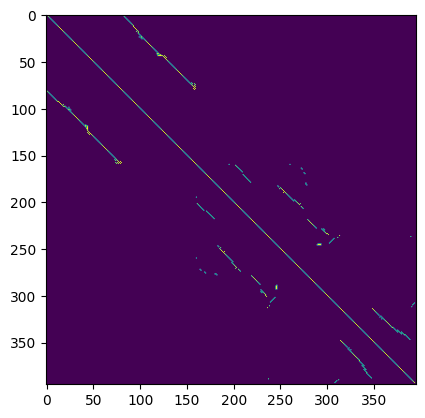

In [5]:
gt = data.edge_attr
gt = dense_edge(data.edge_index, gt.squeeze())
plt.imshow(gt)

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

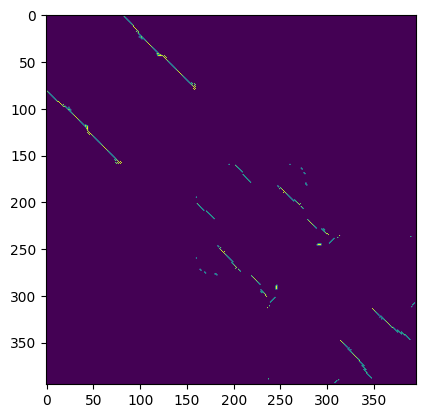

In [34]:
plt.imshow(gt.astype(np.uint8)*255)

In [38]:
gt = gt.astype(np.uint8)*255

In [42]:
wandb.log({"img_0bool":wandb.Image(gt)})

In [43]:
gt

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [48]:
gg = np.random.uniform(0,1,(256,256)).astype(np.float64)
# pred = np.random.randint(0,2,(15,1))
# pred = np.vstack((1-pred[:, 0], pred[:,0])).T
# pred.shape

In [ ]:
x = torch.randn((1, 1), requires_grad=True)
with torch.autograd.profiler.profile() as prof:
    for _ in range(100):  # any normal python code, really!
        y = x ** 2
        y.backward()
# NOTE: some columns were removed for brevity
print(prof.key_averages().table(sort_by="self_cpu_time_total"))

In [67]:
wandb.run.summary['CPU'] = prof.self_cpu_time_total

In [69]:
wandb.finish()

CPU,8488


In [ ]:
# Create a table with the columns to plot
table = wandb.Table(data=np.random.randint(0,10,(256, 256)),
                    columns=list(range(256)))

# # Map from the table's columns to the chart's fields
# fields = {"x": "step",
#           "value": "height"}

# # Use the table to populate the new custom chart preset
# # To use your own saved chart preset, change the vega_spec_name
# my_custom_chart = wandb.plot_table(
#     vega_spec_name="carey/new_chart",
#     data_table=table,
#     fields=fields)

In [59]:
gt = np.random.randint(0,2,(256*256, ))
pred = np.random.uniform(0,1,(256, 256))

gt = np.expand_dims(gt.flatten(), -1)
pred = np.expand_dims(pred.flatten(), -1)
pred =  np.vstack([1 - pred[:,0], pred[:,0]]).T
wandb.log({"PR curve":wandb.plot.pr_curve(gt, pred, labels = [0,1])})

In [58]:
gt.shape

(65536, 1)

In [ ]:
wandb.log({"PR curve":wandb.plots.HeatMap(list(range(256)), list(range(256)),np.random.randint(0,10,(256,256)))})